In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np


In [27]:
path_gtex_lung = '/nfs/data2/dysregnet_gtex/gtex/gene_tpm_v10_lung_filtered.csv'
path_gtex_breast= '/nfs/data2/dysregnet_gtex/gtex/gene_tpm_v10_breast_mammary_tissu_filtered.csv'
path_tcga_lung = '/nfs/data2/dysregnet_gtex/gtex/tcga_lung_controls.csv'
path_tcga_breast = '/nfs/data2/dysregnet_gtex/gtex/tcga_breast_controls.csv'

In [30]:
gtex_lung = pd.read_csv(path_gtex_lung, index_col=0)
gtex_breast= pd.read_csv(path_gtex_breast, index_col=0)
tcga_lung = pd.read_csv(path_tcga_lung, index_col=0)
tcga_breast = pd.read_csv(path_tcga_breast, index_col=0)

In [31]:
tcga_breast

,TCGA-BH-A204-11,TCGA-BH-A0DH-11,TCGA-E2-A1BC-11,TCGA-BH-A18J-11,TCGA-BH-A0BM-11,TCGA-E9-A1RB-11,TCGA-BH-A0DG-11,TCGA-E2-A15I-11,TCGA-A7-A13E-11,TCGA-AC-A2FF-11,...,TCGA-E2-A1L7-11,TCGA-E2-A158-11,TCGA-BH-A0E1-11,TCGA-BH-A1FG-11,TCGA-BH-A208-11,TCGA-BH-A1EU-11,TCGA-GI-A2C9-11,TCGA-A7-A13F-11,TCGA-E9-A1NG-11,TCGA-E9-A1N4-11
sample,,,,,,,,,,,,,,,,,,,,,
RP11-34P13.7,0.599985,4.500002e-01,3.199899e-01,0.979983,0.349990,5.600106e-01,7.399767e-01,0.479997,0.290002,0.629995,...,0.570015,0.959994,0.290002,5.499907e-01,1.280026,1.090037e+00,0.589988,0.360007,0.959994,1.449952
RP11-34P13.8,0.180005,-1.089298e-08,-1.089298e-08,0.530006,1.070031,-1.089298e-08,3.800098e-01,0.219997,0.579996,0.629995,...,0.560011,0.869973,0.760017,-1.089298e-08,0.629995,-1.089298e-08,0.530006,0.219997,0.270007,0.299993
CICP27,0.370002,2.999926e-01,2.399992e-01,1.130001,0.690020,7.000066e-01,1.310029e+00,0.319990,0.339990,0.900001,...,0.909986,0.879991,0.250007,9.999639e-03,0.659990,6.799874e-01,1.059982,0.640002,0.440015,0.890002
RP11-34P13.15,3.239912,1.293034e+01,6.270019e+00,11.099864,6.069856,1.690027e+00,8.699731e-01,3.569930,4.969876,2.269956,...,8.610115,2.440047,2.290036,3.139948e+00,3.949951,7.910219e+00,7.250101,3.099928,2.160001,4.249993
RP11-34P13.16,3.009911,1.050033e+01,9.400218e-01,14.340261,0.829988,7.200144e-01,-1.089298e-08,2.499991,2.200062,1.349974,...,5.630035,2.829977,1.130001,2.829977e+00,4.729852,1.032994e+01,2.870093,2.499991,1.800002,5.529845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MT-ND4L,20120.798342,5.274065e+03,1.203710e+04,7443.677345,7446.257575,1.334027e+04,5.879997e+03,17380.716267,14012.239162,4698.875061,...,3960.315454,14443.170997,3344.325531,5.510623e+03,6249.823660,9.728488e+03,3784.008512,8336.926073,12375.505912,7149.862580
MT-ND4,30434.076165,1.137674e+04,1.859465e+04,8733.231298,11049.549033,1.793139e+04,7.256709e+03,26630.648598,16675.008929,6963.513955,...,5101.124926,18985.362486,4466.409074,1.377056e+04,8219.300048,1.431361e+04,4873.355337,11479.720325,13900.988885,8442.179733
MT-ND5,5023.578525,2.139116e+03,3.794515e+03,3288.695138,2694.869067,5.033687e+03,3.700744e+03,6878.125813,6580.127306,2476.521478,...,1169.599404,5524.008173,706.133894,2.824734e+03,1771.553336,5.043466e+03,1853.323769,2622.813390,2024.569267,1515.101833


In [32]:
common_genes = list(set(gtex_lung.index) & set(gtex_breast.index) & set(tcga_lung.index) & set(tcga_breast.index))
print(len(common_genes))
combined_matrix = pd.concat([gtex_lung.loc[common_genes], 
                             gtex_breast.loc[common_genes],
                             tcga_lung.loc[common_genes],
                             tcga_breast.loc[common_genes]], axis=1)


16258


In [33]:
labels = ['gtex_lung'] * gtex_lung.shape[1] + ['gtex_breast'] * gtex_breast.shape[1] + \
         ['tcga_lung'] * tcga_lung.shape[1] + ['tcga_breast'] * tcga_breast.shape[1]

In [34]:
combined_matrix

,GTEX-111CU-0326-SM-5GZXO,GTEX-111FC-1126-SM-5GZWU,GTEX-111VG-0726-SM-5GIDC,GTEX-111YS-0626-SM-5GZXV,GTEX-1122O-0126-SM-5GICA,GTEX-1128S-0726-SM-5N9D6,GTEX-117YW-0526-SM-5H11C,GTEX-117YX-1326-SM-5H125,GTEX-11DXX-0626-SM-5Q5AG,GTEX-11DXZ-0726-SM-5N9C4,...,TCGA-E2-A1L7-11,TCGA-E2-A158-11,TCGA-BH-A0E1-11,TCGA-BH-A1FG-11,TCGA-BH-A208-11,TCGA-BH-A1EU-11,TCGA-GI-A2C9-11,TCGA-A7-A13F-11,TCGA-E9-A1NG-11,TCGA-E9-A1N4-11
MED13,22.043900,20.15030,31.396800,27.470000,13.897900,24.534800,29.698400,24.44630,20.290700,14.898800,...,13.149995,11.349626,7.809961,10.839805,16.839931,21.919366,14.989743,10.640282,15.289885,18.260078
MIPOL1,0.431328,3.54118,3.563420,0.867906,0.624847,1.731800,1.076390,0.76250,0.729712,0.766705,...,6.179827,4.420084,3.869983,3.759957,6.179827,6.720112,4.179861,3.360022,4.690015,7.490216
RPL7P23,0.605829,0.65062,0.914971,0.381784,0.430723,0.740644,0.698725,0.56699,0.429565,1.080440,...,2.040034,0.769999,2.880061,2.459924,1.960014,1.329990,1.660055,1.660055,1.819961,3.709979
DHX37,40.864400,9.88891,7.666130,9.966260,11.435500,12.391600,7.525220,12.49990,18.288100,14.045600,...,10.680186,5.050108,6.970166,0.750008,7.750094,6.050111,7.449824,5.160177,5.589975,8.789834
TKFC,9.218480,13.45920,13.200900,9.570430,14.003000,9.510080,9.932100,12.86160,11.398300,21.692800,...,51.638388,22.229986,38.608929,18.809939,35.769540,30.870421,28.200500,27.789117,19.999997,37.059232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SLC22A15,7.219410,6.95357,5.284460,10.457600,9.694580,12.445000,7.594090,12.80620,8.634780,18.716600,...,1.029968,0.820026,0.530006,0.800014,0.930030,1.319972,1.120011,0.810015,1.029968,1.800002
ZNF507,7.708670,11.18700,6.513570,9.587450,7.822960,9.380570,7.256760,9.68064,10.628500,6.650620,...,8.330060,7.889955,7.009902,5.619896,13.510351,12.409592,8.239889,7.690154,6.680166,14.589931
GTDC1,2.727050,7.09122,8.025190,7.058450,4.671170,7.045420,7.370760,5.53213,5.031300,3.477540,...,11.430161,20.310150,8.479798,15.400511,10.450224,15.740488,12.790380,16.389637,26.249991,9.030089
TK2,8.013820,16.80060,13.204900,14.482600,20.418700,9.796380,14.310700,17.75880,20.062300,20.710600,...,27.340112,50.250683,15.289885,14.959640,20.599394,33.510863,26.240895,55.371586,53.958310,19.459812


In [35]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(combined_matrix.T)
pc1 = pca_result[:, 0]
pc2 = pca_result[:, 1]

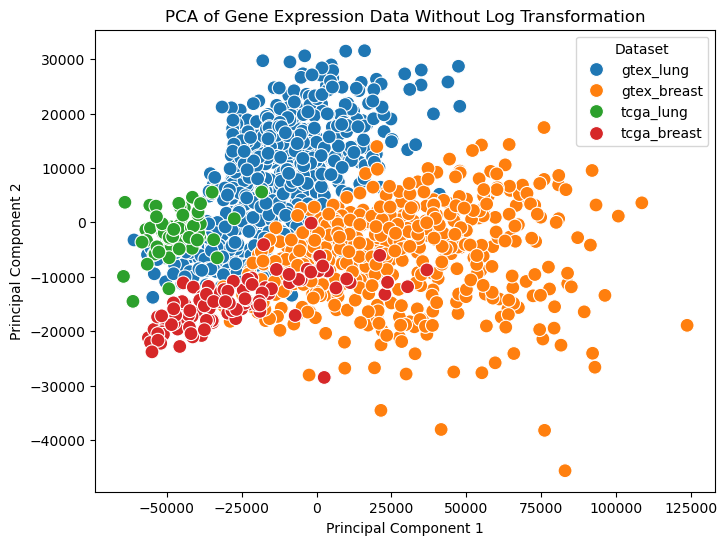

In [38]:
pca_df = pd.DataFrame({
    'PC1': pc1,
    'PC2': pc2,
    'Dataset': labels
})

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Dataset', palette='tab10', s=100)
plt.title('PCA of Gene Expression Data Without Log Transformation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Dataset')
plt.show()

In [44]:
combined_matrix_log = np.log10(0.01 + combined_matrix.T)

In [45]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(combined_matrix_log)
pc1 = pca_result[:, 0]
pc2 = pca_result[:, 1]

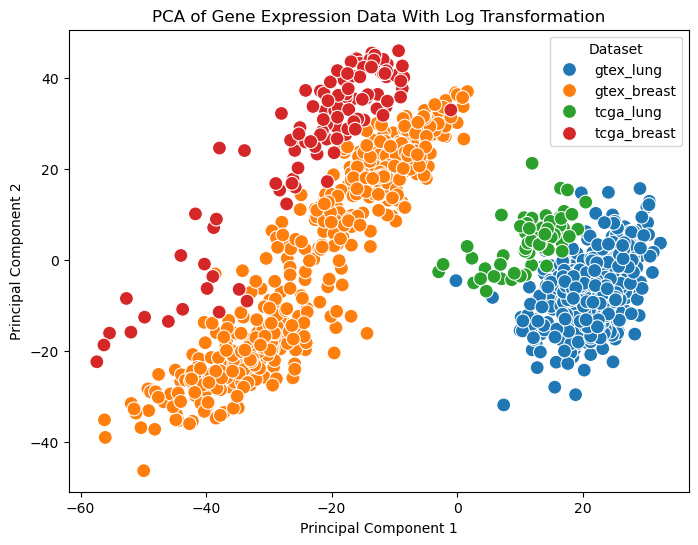

In [46]:
pca_df = pd.DataFrame({
    'PC1': pc1,
    'PC2': pc2,
    'Dataset': labels
})

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Dataset', palette='tab10', s=100)
plt.title('PCA of Gene Expression Data With Log Transformation')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Dataset')
plt.show()